In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
train_data = pd.read_csv("/kaggle/input/titanic/train.csv")
test_data = pd.read_csv("/kaggle/input/titanic/test.csv")
gender_submission_data = pd.read_csv("/kaggle/input/titanic/gender_submission.csv")

In [3]:
avg_age = int(np.average(train_data['Age'][train_data['Age'].isna()==False]))
train_data['Age'].fillna(avg_age, inplace = True)

In [4]:
train_data['Sex_Num'] = train_data['Sex'].map({'female':0, 'male':1}).astype(int)

In [5]:
train_data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_Num
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0


Survived    0    1
Sex               
female     81  233
male      468  109


<AxesSubplot:xlabel='Sex'>

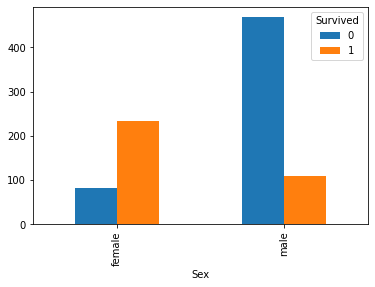

In [6]:
grouped_sex = train_data.groupby(['Survived','Sex']).count()['PassengerId'].unstack(level=0)
print(grouped_sex)
grouped_sex.plot.bar()

Survived         0   1
Sex    Pclass         
female 1         3  91
       2         6  70
       3        72  72
male   1        77  45
       2        91  17
       3       300  47


<AxesSubplot:xlabel='Sex,Pclass'>

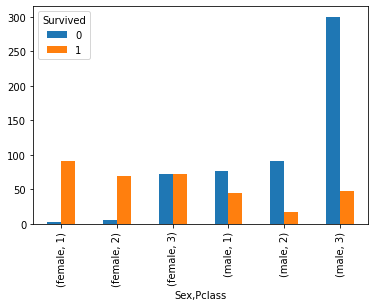

In [7]:
grouped_class_sex = train_data.groupby(['Survived','Sex', 'Pclass']).count()['PassengerId'].unstack(level=0)
print(grouped_class_sex)
grouped_class_sex.plot.bar()

In [8]:
#para crear un WHERE como SQL usamos la funcion np.where de NUMPY
train_data['Trvl_Aln']= np.where((train_data['SibSp'] == 0) & (train_data['Parch'] == 0),1,0) #1 si viaja solo, 0 e.o.c

In [9]:
train_data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_Num,Trvl_Aln
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1


Survived    0    1
Trvl_Aln          
0         175  179
1         374  163


<AxesSubplot:xlabel='Trvl_Aln'>

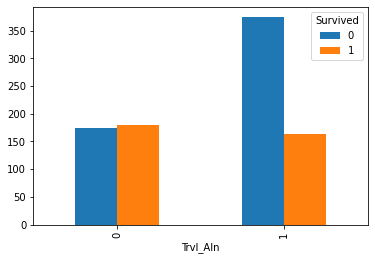

In [10]:
grouped_trvalo_Survived = train_data.groupby(['Survived', 'Trvl_Aln']).count()['PassengerId'].unstack(level=0)
print(grouped_trvalo_Survived)
grouped_trvalo_Survived.plot.bar()

In [11]:
train_data.groupby(['Survived', 'Embarked']).count()['PassengerId']

Survived  Embarked
0         C            75
          Q            47
          S           427
1         C            93
          Q            30
          S           217
Name: PassengerId, dtype: int64

## Crear Modelo de MI

In [12]:
# variable dependiente
Y_train = train_data['Survived']

# preprocesamiento de variables independientes
features = ['Sex_Num', 'Age', 'Pclass', 'Trvl_Aln']
X_train = train_data[features]

print(Y_train.shape, X_train.shape)

(891,) (891, 4)


Sin entrar en mucho detalle. Vamos a escoger dos modelos de prueba.
* regresión logistica
* arboles de decisión

In [13]:
# entrenando modelo regresión logistica
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

LogisticRegression()

In [14]:
# entrenando modelo arboles de decisión
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)

DecisionTreeClassifier()

In [15]:
import matplotlib.pyplot as plt

In [16]:
from sklearn.metrics import plot_confusion_matrix

def conf_mat_acc(modelo):
  disp = plot_confusion_matrix(modelo, X_train, Y_train,
                        cmap=plt.cm.Blues, values_format="d")
  true_pred = disp.confusion_matrix[0,0]+disp.confusion_matrix[1,1]
  total_data = np.sum(disp.confusion_matrix)
  accuracy = true_pred/total_data
  print('accuracy: ', np.round(accuracy, 2))
  plt.show()

accuracy:  0.79


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


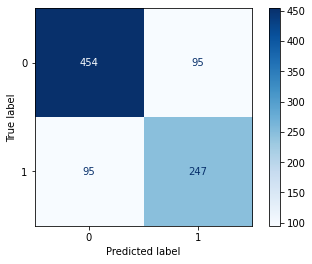

In [17]:
conf_mat_acc(logreg)

accuracy:  0.9


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


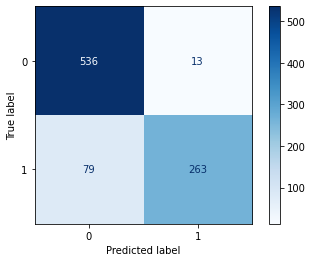

In [18]:
conf_mat_acc(decision_tree)